### Libraries Loading

In [203]:
import numpy as np
import pandas as pd
from random import randint

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Load the audio features DataFrame previously constructed for 49k+ songs (Spotify Large Playlists)

In [204]:
df_spotify_audio_feat=pd.read_csv("output_files/df_spotify_audio_feat.csv")
display(df_spotify_audio_feat.shape)
df_spotify_audio_feat.head()

(49654, 18)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.532,0.887,0,-3.757,1,0.0335,0.07780,0.000214,0.2940,0.795,122.511,audio_features,37ZJ0p5Jm13JPevGcx4SkF,spotify:track:37ZJ0p5Jm13JPevGcx4SkF,https://api.spotify.com/v1/tracks/37ZJ0p5Jm13J...,https://api.spotify.com/v1/audio-analysis/37ZJ...,249293,4
1,0.335,0.422,5,-15.172,0,0.0519,0.71600,0.000040,0.0455,0.553,97.660,audio_features,0u2CGItUO2jYEiFaXD7n5S,spotify:track:0u2CGItUO2jYEiFaXD7n5S,https://api.spotify.com/v1/tracks/0u2CGItUO2jY...,https://api.spotify.com/v1/audio-analysis/0u2C...,291760,4
2,0.256,0.679,9,-4.495,0,0.0387,0.00451,0.040900,0.1720,0.325,158.718,audio_features,40pPI2TbaYSZlKfV44HRjn,spotify:track:40pPI2TbaYSZlKfV44HRjn,https://api.spotify.com/v1/tracks/40pPI2TbaYSZ...,https://api.spotify.com/v1/audio-analysis/40pP...,295373,4
3,0.728,0.784,11,-11.776,1,0.0379,0.04490,0.091800,0.0964,0.964,129.981,audio_features,59VRFpPnC8pOhIH2WCWXF9,spotify:track:59VRFpPnC8pOhIH2WCWXF9,https://api.spotify.com/v1/tracks/59VRFpPnC8pO...,https://api.spotify.com/v1/audio-analysis/59VR...,247406,4
4,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,audio_features,3yfqSUWxFvZELEM4PmlwIR,spotify:track:3yfqSUWxFvZELEM4PmlwIR,https://api.spotify.com/v1/tracks/3yfqSUWxFvZE...,https://api.spotify.com/v1/audio-analysis/3yfq...,284200,4


## Function Definitions

### Inertia

In [206]:
def display_inertia(X_prep):
    import numpy as np
    K = range(2, 20)
    inertia = []

    for k in K:
        kmeans = KMeans(n_clusters=k,random_state=1201)
        kmeans.fit(X_prep)
        inertia.append(kmeans.inertia_)

    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.figure(figsize=(16,8))
    plt.plot(K, inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.xticks(np.arange(min(K), max(K)+1, 1.0))
    plt.title('Elbow Method showing the optimal k')

### Silhoutte

In [207]:
def display_silhoutte(X_prep):
    K = range(2, 20)
    silhouette = []

    for k in K:
        kmeans = KMeans(n_clusters=k,random_state=1201)
        kmeans.fit(X_prep)
        silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


    plt.figure(figsize=(16,8))
    plt.plot(K, silhouette, 'bx-')
    plt.xlabel('k')
    plt.ylabel('silhouette score')
    plt.xticks(np.arange(min(K), max(K)+1, 1.0))
    plt.title('Slhouette score showing the optimal k')

## KMeans Clustering

In [208]:
drop_cols=['type','id','uri','track_href','analysis_url']
scaler = StandardScaler()
X_prep = scaler.fit_transform(df_spotify_audio_feat.drop(drop_cols,axis=1))

Caveat: Run only if needed while preparing new clusters

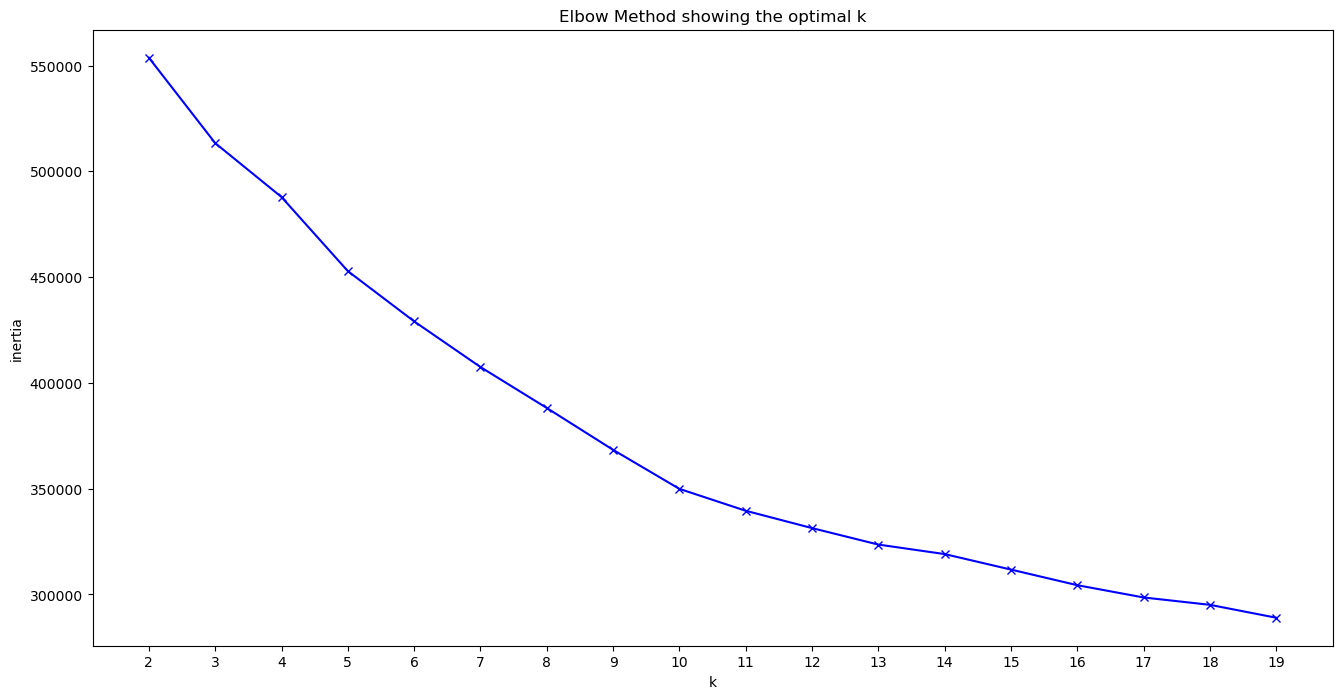

In [253]:
#display_inertia(X_prep)

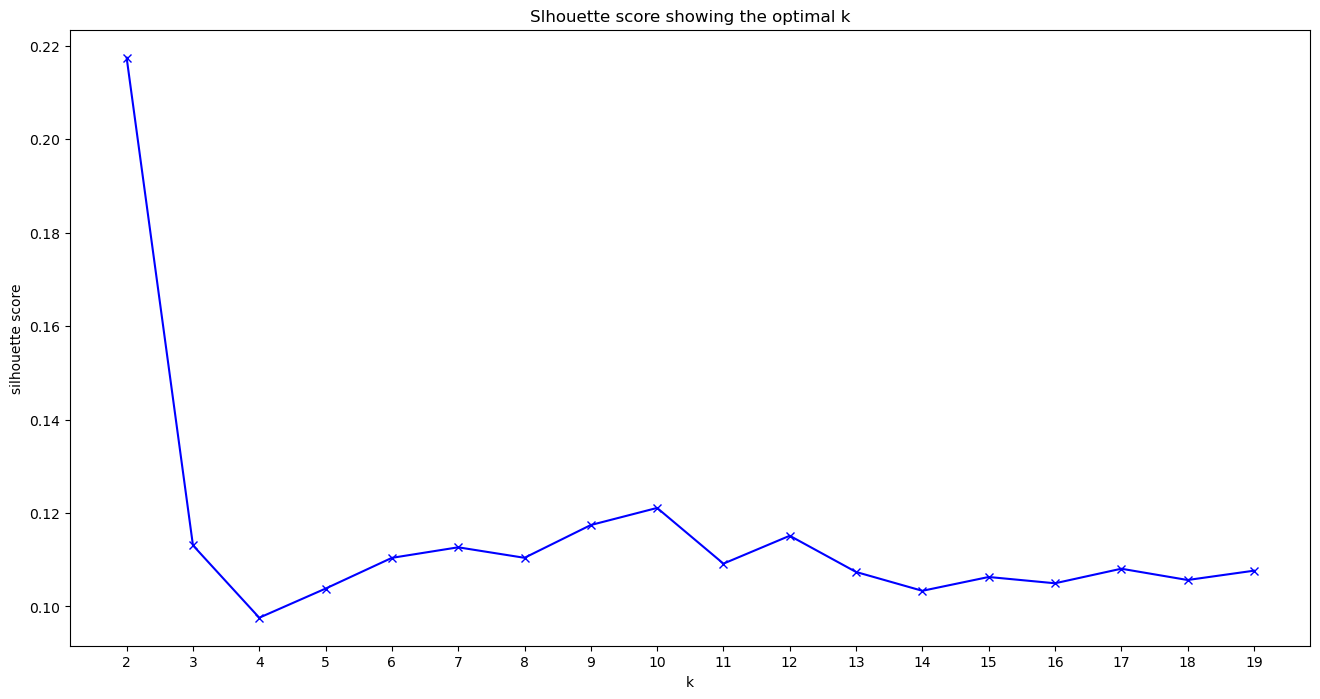

In [254]:
#display_silhoutte(X_prep)

### Perform Clustering

In [211]:
kmeans = KMeans(n_clusters=10, random_state=1201)
kmeans.fit(X_prep)

KMeans(n_clusters=10, random_state=1201)

In [212]:
clusters = kmeans.predict(X_prep)
clusters

array([8, 6, 4, ..., 3, 8, 7])

In [213]:
df_spotify_audio_feat['cluster']=clusters

### Merge the Spotify Songs Info with calculated clusters from the prediction model

In [214]:
df_spotify_info=pd.read_csv("output_files/df_spotify_info.csv")
df_billboard_100=pd.read_csv("output_files/df_billboard_100.csv")

df_spotify_song_cluster = pd.merge(left = df_spotify_info,
                                 right = df_spotify_audio_feat[['uri','cluster']],
                                 how = 'inner', 
                                 left_on = ['uri'], 
                                 right_on= ['uri'])
df_spotify_song_cluster.head()

,track,artist,href,uri,cluster
0,Livin' On A Prayer,Bon Jovi,https://api.spotify.com/v1/tracks/37ZJ0p5Jm13J...,spotify:track:37ZJ0p5Jm13JPevGcx4SkF,8
1,Wishing on a Star,Rose Royce,https://api.spotify.com/v1/tracks/0u2CGItUO2jY...,spotify:track:0u2CGItUO2jYEiFaXD7n5S,6
2,Supremacy,Muse,https://api.spotify.com/v1/tracks/40pPI2TbaYSZ...,spotify:track:40pPI2TbaYSZlKfV44HRjn,4
3,Saturday Night - Radio Mix,Whigfield,https://api.spotify.com/v1/tracks/59VRFpPnC8pO...,spotify:track:59VRFpPnC8pOhIH2WCWXF9,8
4,The Real Slim Shady,Eminem,https://api.spotify.com/v1/tracks/3yfqSUWxFvZE...,spotify:track:3yfqSUWxFvZELEM4PmlwIR,1


### Initialization Function for Spotify API Handler Object

In [215]:
def init_spotify(auth_file):
    secrets_file = open(auth_file,"r")
    secrets_dict={}
    for line in secrets_file.read().split('\n'):
        if len(line) > 0:
            secrets_dict[line.split(':')[0]]=line.split(':')[1]
    return spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientid'],
                                                               client_secret=secrets_dict['clientsecret']))

### Initialize Spotify API Handler

In [216]:
auth_file="secrets.txt"
sp=init_spotify(auth_file)

### Song Recommender Function

In [244]:
def recommend_song(input_title,input_artist):
    df_search_result=df_billboard_100[(df_billboard_100['title'].str.contains(input_title, case=False)) & (df_billboard_100['artist'].str.contains(input_artist, case=False))]
    if len(df_search_result)>0:
        print("Recommendations found from the Billboard top 100.")
        preference_result=df_billboard_100[~df_billboard_100.index.isin([df_search_result.index.values[0]])].reset_index(drop=True)
        random_index=randint(1,len(preference_result.index))
        print()
        print("Title: ", preference_result.iloc[random_index,0])
        print("Artist: ", preference_result.iloc[random_index,1])
    else:
        results = sp.search(q=input_title+' '+input_artist, limit=50)
        print("No recommendations were found in the Billboard top 100. Looking into other recommendations for you..")
        print()
        print("Your Input Song:")
        print()
        print("Track: ", results['tracks']['items'][0]['name'])
        print("Artist: ", results['tracks']['items'][0]['artists'][0]['name'])
        print("Link: ", results['tracks']['items'][0]['href'])
        print("URI: ", results['tracks']['items'][0]['uri'])
        print()
        X_prep = scaler.transform(pd.DataFrame.from_dict(sp.audio_features(results['tracks']['items'][0]['uri'])).drop(drop_cols,axis=1))
        cluster = kmeans.predict(X_prep)
        preference_result=df_spotify_info[df_spotify_song_cluster['cluster']==cluster[0]]
        random_index=randint(1,len(preference_result.index))
        print("Your Recommendation:")
        print()
        print("Track: ", preference_result.iloc[random_index,0])
        print("Artist: ", preference_result.iloc[random_index,1])
        print("Link: ", preference_result.iloc[random_index,2])
        print("URI: ", preference_result.iloc[random_index,3])

### Run Recommender

In [252]:
print("-- SONG RECOMMENDER SYSTEM --")
print()
input_title = input("Enter the title of the song:")
input_artist = input("Enter the artist of the song:")
recommend_song(input_title,input_artist)

-- SONG RECOMMENDER SYSTEM --

Enter the title of the song:da da da
Enter the artist of the song:trio
No recommendations were found in the Billboard top 100. Looking into other recommendations for you..

Your Input Song:

Track:  Da Da Da I Don't Love You You Don't Love Me Aha Aha Aha
Artist:  Trio
Link:  https://api.spotify.com/v1/tracks/5XZkMrlZsAqY9ltgN1cN4b
URI:  spotify:track:5XZkMrlZsAqY9ltgN1cN4b

Your Recommendation:

Track:  Стрелы
Artist:  Markul
Link:  https://api.spotify.com/v1/tracks/2xKA5mKz7swl48YzRsw6d3
URI:  spotify:track:2xKA5mKz7swl48YzRsw6d3
